# **Jurnal Modul 1**
## **(Histogram, Konvolusi, dan Operasi Dasar Citra)**
### - Rizki Rahman Maulana

#### **Menampilkan Gambar dan Grayscale**

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import matplotlib.image as gambar
import cv2

Terlebih dahulu lakukan import untuk library numpy, cv2 dan matplotlib

Setelah itu, menampilkan gambar yang akan diimport dengan code berikut

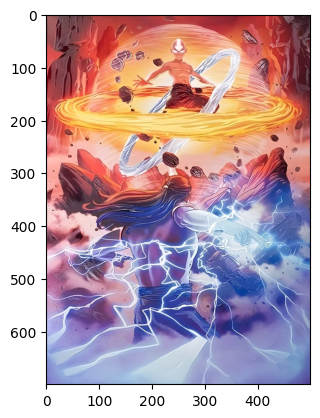

In [17]:
image = plt.imread("aang.jpg",0)
plt.imshow(image) 

Langkah selanjutnya dengan mengubah gambar menjadi grayscale terlebih dahulu

(700, 500)


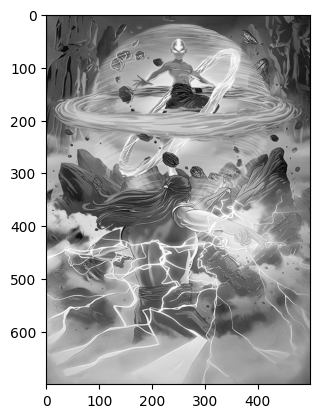

In [18]:
gray =cv2.cvtColor(image, cv.COLOR_BGR2GRAY)
plt.imshow(gray, cmap="gray")
print (gray.shape)

#### **Melakukan Proses Clipping dan Normalisasi**

In [19]:
clipping_image = np.clip(gray, 120, 200)  

normalized_image = cv2.normalize(clipping_image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

Kode tersebut berfungsi mengubah citra grayscale dengan clipping dengan batas antara 120 dan 200, lalu dinormalisasi diantara rentang 0-255.

Hasil Code diatas ditampilkan dengan 3 tahap gambar yaitu gambar awal, setelah clipping, dan setelah normalisasi. Hal ini untuk membedakan gambar pada setiap tahap.

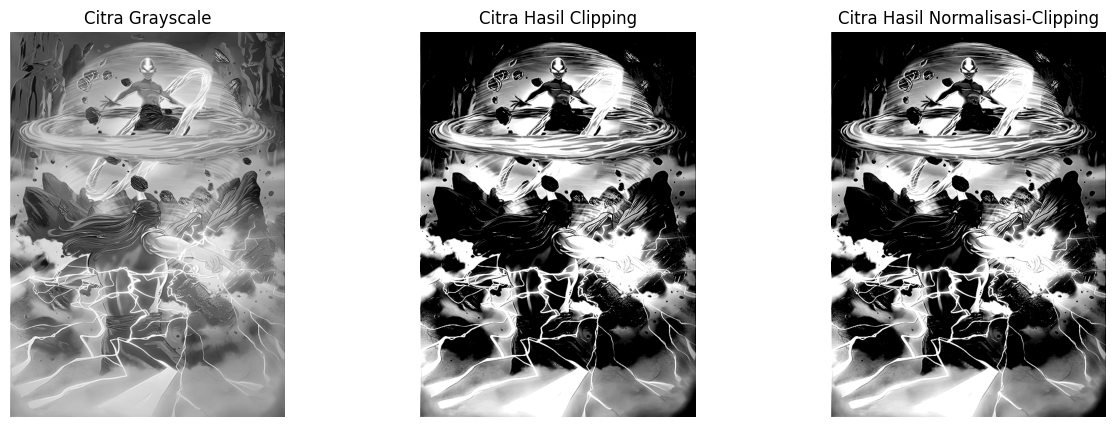

In [20]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(gray, cmap='gray')
plt.title('Citra Grayscale')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(clipping_image, cmap='gray')
plt.title('Citra Hasil Clipping')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(normalized_image, cmap='gray')
plt.title('Citra Hasil Normalisasi-Clipping')
plt.axis('off')

plt.show()

#### **Menampilkan Histogram Normalisasi**

Tampilkan Histogram hasil normalisasi dari gambar diatas

<BarContainer object of 256 artists>

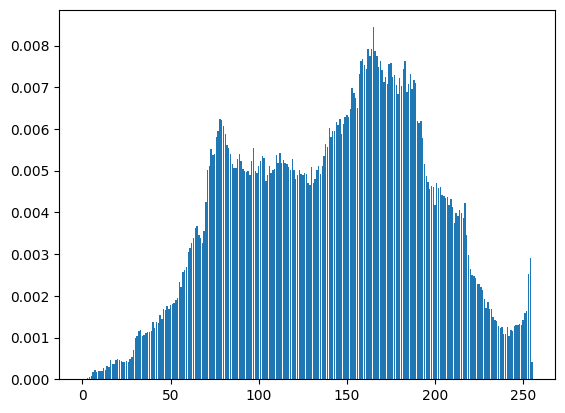

In [21]:
height, width = normalized_image.shape
sumGray = np.zeros(256).astype(int)

for i in range (height):
    for j in range (width):
        val = gray [i,j]
        sumGray[val]+=1
    
    grayVal = [i for i in range(256)]
    
plt.bar(grayVal, sumGray/sumGray.sum())

#### **Proses Konvolusi**

Setelah itu, lakukan operasi konvolusi dengan kernel 4*4 yang tersedia dari gambar yang telah dinormalisasi. Tampilkan hasil normalisasi dan konvolusi tersebut untuk membandingkan gambarnya

Text(0.5, 1.0, 'Citra Konvolusi')

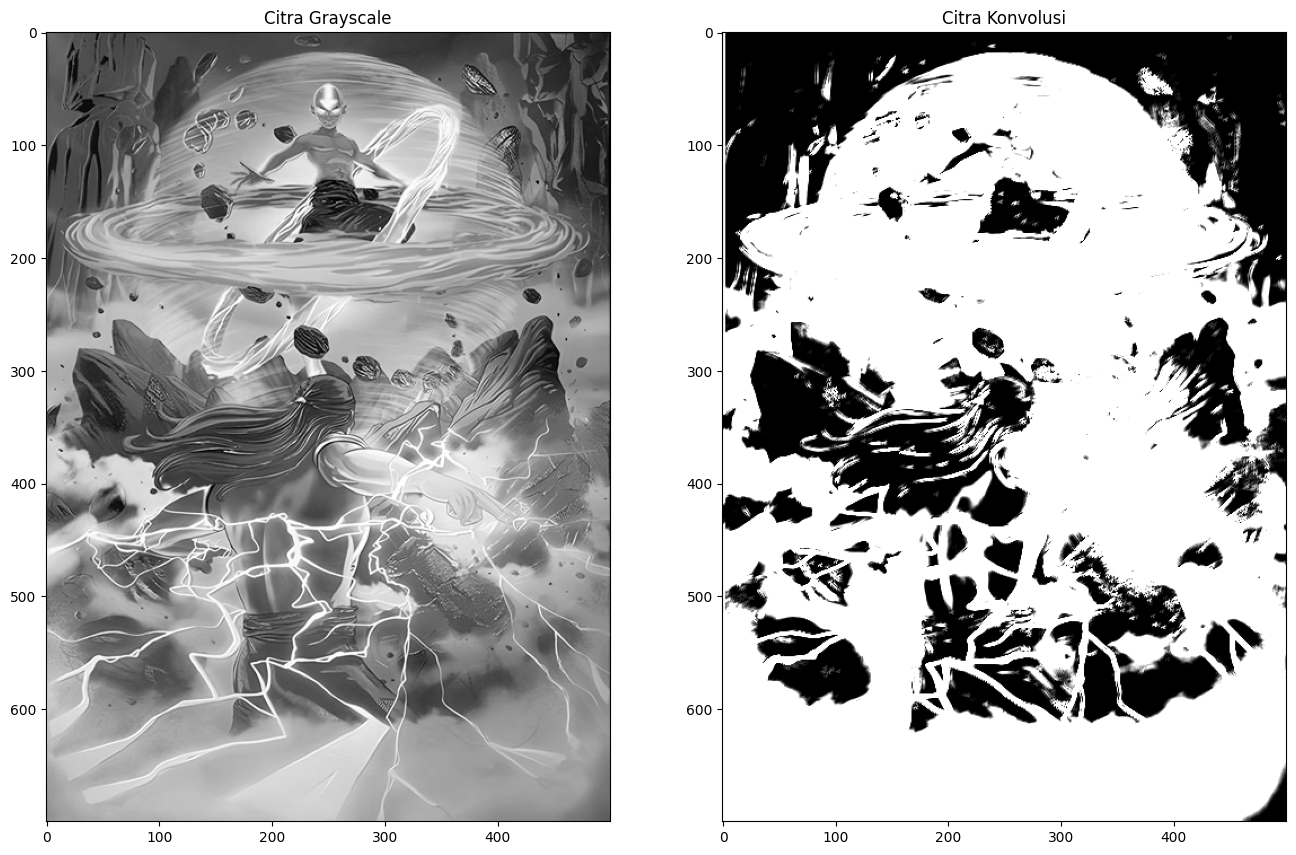

In [22]:
kernel = np.array([
    [1,2,-1,1],
    [0,2,1,2],
    [2,1,1,0],
    [1,0,-1,0],
])
citraOutput = cv2.filter2D(normalized_image, -1, kernel)

fig, axes = plt.subplots(1,2,figsize=(16,16))
ax = axes.ravel()

ax[0].imshow(gray,cmap='gray')
ax[0].set_title("Citra Grayscale")
ax[1].imshow(citraOutput, cmap = 'gray')
ax[1].set_title("Citra Konvolusi")

#### **Proses Rotasi dan Translasi**

In [23]:
height, width = gray.shape[:2]
center = (width // 2, height // 2)
angle = -40  #- artinya searah jarum jam

matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated_image = cv2.warpAffine(gray, matrix, (width, height))


Deretan kode tersebut menghasilkan rotasi gambar grayscale 'gray' sebesar 40 derajat searah jarum jam ditandai dengan tanda min (-) terhadap pusatnya menggunakan transformasi matriks rotasi.

Hasil Rotasi tersebut kemudian ditampilkan

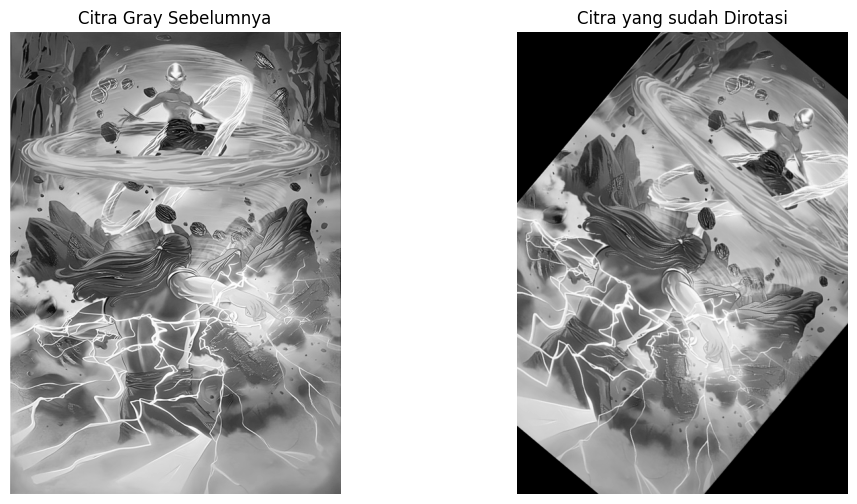

In [24]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title('Citra Gray Sebelumnya')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(rotated_image, cmap='gray')
plt.title('Citra yang sudah Dirotasi')
plt.axis('off')

plt.show()

In [25]:
M = np.float32([[1, 0, -163], [0, 1, 300]])
translated_image = cv2.warpAffine(rotated_image, M, (width, height))

Deretan kode tersebut menerapkan translasi sebesar -163 piksel ke arah sumbu x dan 300 piksel ke arah sumbu y pada gambar yang telah dirotasi sebelumnya.

Lalu menampilkan gambar yang telah mengalami proses translasi

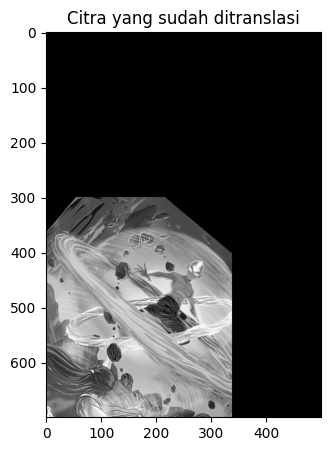

In [30]:
plt.figure(figsize=(8, 5))
plt.imshow(translated_image, cmap='gray')
plt.title('Citra yang sudah ditranslasi')
plt.show()

#### **Pencerminan Terhadap Sumbu y**

Kode berikut memperlihatkan citra pencerminan terhadap sumbu y dari citra yang telah ditranslasi sebelumnya.

Text(0.5, 1.0, 'Citra yang sudah Dicerminkan')

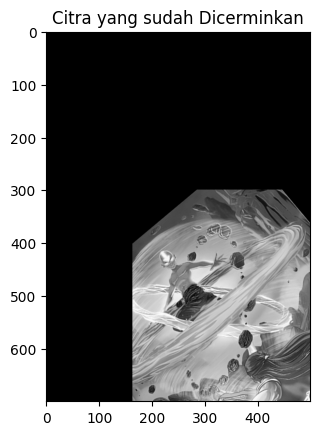

In [27]:
flipped_image = cv2.flip(translated_image, 1)
plt.imshow(flipped_image, cmap='gray')
plt.title('Citra yang sudah Dicerminkan')

#### **Proses Dilatasi**

In [28]:
new_height = int(flipped_image.shape[0] * 3)
new_width = int(flipped_image.shape[1] * 3)

dilated_image = cv2.resize(flipped_image, (new_width, new_height))


Kode diatas menghasilkan citra yang dilatasi diperbesar tiga kali lipat dari ukuran aslinya menggunakan fungsi cv2.resize().

Lalu menampilkan hasil dilatasi dengan skala abu-abu

Text(0.5, 1.0, 'Citra yang sudah Dilatasi')

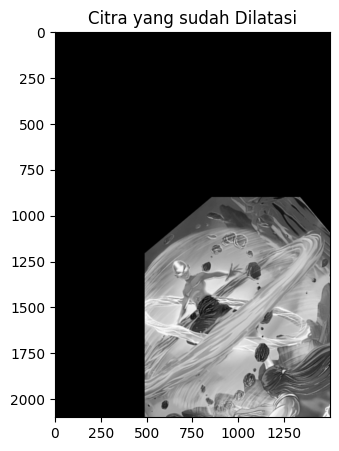

In [29]:
plt.figure(figsize=(8, 5))
plt.imshow(dilated_image, cmap='gray')
plt.title('Citra yang sudah Dilatasi')